<a href="https://colab.research.google.com/github/dhamu2908/GPU-Programming/blob/main/DeepLearning_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
#importing packages
from keras.datasets import fashion_mnist
from keras.datasets import mnist
import pandas as pd
import numpy as np
import wandb
import math
import matplotlib.pyplot as plt
import seaborn as sns

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


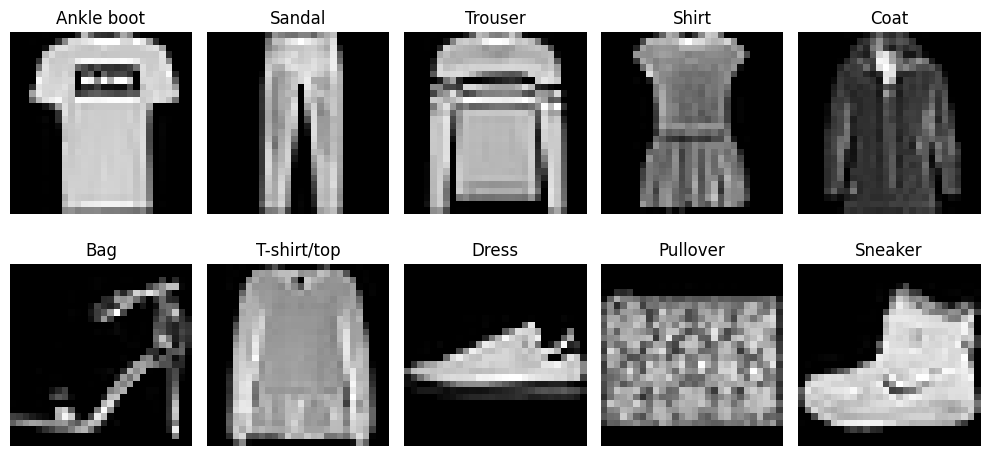

In [14]:
# Loading the Fashion MNIST dataset
(train_data, train_labels), (test_data , test_labels) = fashion_mnist.load_data()

# Defining class names for Fashion MNIST
fashion_classes = ['Ankle boot', 'Sandal', 'Trouser', 'Shirt', 'Coat', 'Bag', 'T-shirt/top', 'Dress', 'Pullover', 'Sneaker']

# Function to select one image per class
def select_images_per_class(images, labels, num_classes=10):
    selected_images = []
    for class_id in range(num_classes):
        # Find the first image that belongs to the current class
        first_image_index = np.where(labels == class_id)[0][0]
        selected_images.append(images[first_image_index])
    return selected_images

# Selecting one image per class
selected_images = select_images_per_class(train_data, train_labels)

# Function to visualize and log images
def visualize_and_log_images(images, class_names, save_filename='fashion_mnist_samples.png'):
    plt.figure(figsize=(10, 5))
    for i in range(len(images)):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(class_names[i])
        plt.axis('off')
    plt.tight_layout()
    plt.savefig(save_filename)

    # Log the image to Weights & Biases
    wandb.login()
    wandb.init(project='DeepLearning_Assignment1')
    wandb.log({"Fashion MNIST Samples": wandb.Image(save_filename)})

    plt.show()

# Visualize and log the selected images
visualize_and_log_images(selected_images, fashion_classes)

In [23]:
# Function to preprocess (flatten and normalize) images
def preprocess_image_data(images):
    # Flatten each 28x28 image into a 1D array and normalize pixel values to [0, 1]
    return np.array([img.flatten() / 255.0 for img in images])

# Loading the Fashion MNIST dataset
(train_data, train_labels), (test_data, y_test_data) = fashion_mnist.load_data()

# Preprocess the training and test datasets
x_total_train_processed = preprocess_image_data(train_data)
x_test_processed = preprocess_image_data(test_data)

flattened_test_data = []


for i in range(0, len(test_data)):
    flattened_test_data.append(test_data[i].flatten()/255.0)


# Split the training data into training and validation sets
train_validation_split_ratio = 0.9  # 90% training, 10% validation
split_index = int(len(x_total_train_processed) * train_validation_split_ratio)

x_train_final = x_total_train_processed[:split_index]
y_train_final = train_labels[:split_index] # Use train_labels instead of y_total_train_data
x_validation_final = x_total_train_processed[split_index:]
y_validation_final = train_labels[split_index:] # Use train_labels instead of y_total_train_data

In [28]:
class NeuralNetwork:
  import numpy as np

class NeuralNetwork:
    def __init__(self, input_neurons, output_neurons, config):

        self.hidden_layers = config["hidden_layers"]
        self.hidden_neurons = config["hl_size"]
        self.input_neurons = input_neurons # This is where input_size should be used
        self.output_neurons = output_neurons #This is where output_size should be used
        self.total_layers = self.hidden_layers + 1
        self.output_layer_index = self.total_layers - 1
        self.config = config
        self.input_layer_neurons = input_neurons # Store the input layer size for later use
        self.output_layer_neurons = output_neurons # Store output layer size

        # Initialize weights and biases
        self.weights = []
        self.biases = []

        if self.config["initialization"] == "random":
            self._initialize_random()
        elif self.config["initialization"] == "xavier":
            self._initialize_xavier()

    def _initialize_random(self):
        """Initializes weights and biases with small random values."""
        for i in range(self.total_layers):
            if i == 0:
                layer_weights = np.random.randn(self.hidden_neurons, self.input_neurons) * 0.01
                layer_biases = np.random.randn(self.hidden_neurons, 1) * 0.01
            elif i == self.output_layer_index:
                layer_weights = np.random.randn(self.output_neurons, self.hidden_neurons) * 0.01
                layer_biases = np.random.randn(self.output_neurons, 1) * 0.01
            else:
                layer_weights = np.random.randn(self.hidden_neurons, self.hidden_neurons) * 0.01
                layer_biases = np.random.randn(self.hidden_neurons, 1) * 0.01
            self.weights.append(layer_weights)
            self.biases.append(layer_biases)

    def _initialize_xavier(self):
        """Initializes weights using Xavier initialization and biases with zeros."""
        for i in range(self.total_layers):
            if i == 0:
                scale = np.sqrt(2.0 / (self.hidden_neurons + self.input_neurons))
                layer_weights = np.random.randn(self.hidden_neurons, self.input_neurons) * scale
                layer_biases = np.zeros((self.hidden_neurons, 1))
            elif i == self.output_layer_index:
                scale = np.sqrt(2.0 / (self.hidden_neurons + self.output_neurons))
                layer_weights = np.random.randn(self.output_neurons, self.hidden_neurons) * scale
                layer_biases = np.zeros((self.output_neurons, 1))
            else:
                scale = np.sqrt(2.0 / (self.hidden_neurons + self.hidden_neurons))
                layer_weights = np.random.randn(self.hidden_neurons, self.hidden_neurons) * scale
                layer_biases = np.zeros((self.hidden_neurons, 1))
            self.weights.append(layer_weights)
            self.biases.append(layer_biases)

    # Method to perform backpropagation and compute gradients for weights and biases
    def compute_gradients(self, activations, pre_activations, true_label, input_data):
        # Initialize lists to store gradients for activations, pre-activations, weights, and biases
        grad_activations = [None] * self.total_layers
        grad_pre_activations = [None] * self.total_layers
        grad_weights = [None] * self.total_layers
        grad_biases = [None] * self.total_layers

        # Create one-hot encoded vector for the true label
        one_hot_label = np.zeros((self.output_layer_neurons, 1))
        one_hot_label[true_label] = 1

        # Compute the gradient of the loss with respect to the output layer's pre-activations
        if self.config["loss"] == "cross_entropy":
            grad_pre_activations[self.total_layers - 1] = -(one_hot_label - activations[self.total_layers - 1])
        elif self.config["loss"] == "mean_squared_error":
            output_activation = activations[self.total_layers - 1]
            grad_pre_activations[self.total_layers - 1] = (output_activation - one_hot_label) * output_activation * (1 - output_activation)

        # Iterate through layers in reverse order to compute gradients
        for layer_idx in range(self.total_layers - 1, -1, -1):
            if layer_idx == 0:
                # Compute weight gradients for the input layer
                grad_weights[layer_idx] = np.matmul(grad_pre_activations[layer_idx], input_data.reshape(1, -1))
            else:
                # Compute weight gradients for hidden and output layers
                grad_weights[layer_idx] = np.matmul(grad_pre_activations[layer_idx], activations[layer_idx - 1].T)

            # Bias gradients are the same as the pre-activation gradients
            grad_biases[layer_idx] = np.copy(grad_pre_activations[layer_idx])

            if layer_idx - 1 >= 0:
                # Compute gradients for the previous layer's activations
                grad_activations[layer_idx - 1] = np.matmul(self.weights[layer_idx].T, grad_pre_activations[layer_idx])
                # Compute gradients for the previous layer's pre-activations
                grad_pre_activations[layer_idx - 1] = grad_activations[layer_idx - 1] * self.compute_activation_derivative(self.config["activation"], pre_activations[layer_idx - 1])

        # Return the computed gradients for weights and biases
        return grad_weights, grad_biases

    # Takes a flattened image as input and returns activations and pre-activations for all layers
    def forward_propagate(self, input_data):
        # Initialize lists to store pre-activations and activations for each layer
        pre_activations = [None] * self.total_layers
        activations = [None] * self.total_layers

        # Iterate through each layer in the network
        for layer_idx in range(self.total_layers):
            if layer_idx == 0:
                # Compute pre-activation for the input layer
                pre_activations[layer_idx] = np.matmul(self.weights[layer_idx], input_data.reshape(self.input_layer_neurons, 1)) + self.biases[layer_idx]
                # Apply activation function to get the activation for the input layer
                activations[layer_idx] = self.apply_activation(self.config["activation"], pre_activations[layer_idx])

            elif layer_idx == self.total_layers - 1:
                # Compute pre-activation for the output layer
                pre_activations[layer_idx] = np.matmul(self.weights[layer_idx], activations[layer_idx - 1]) + self.biases[layer_idx]
                # Apply softmax activation for the output layer
                activations[layer_idx] = self.softmax(pre_activations[layer_idx])

            else:
                # Compute pre-activation for hidden layers
                pre_activations[layer_idx] = np.matmul(self.weights[layer_idx], activations[layer_idx - 1]) + self.biases[layer_idx]
                # Apply activation function for hidden layers
                activations[layer_idx] = self.apply_activation(self.config["activation"], pre_activations[layer_idx])

        return activations, pre_activations

    # Method to perform gradient descent with momentum optimization
    def momentum_based_gradient_descent(self, training_data, training_labels, validation_data, validation_labels):
        # Initialize previous updates for weights and biases with zeros
        previous_weight_updates = [np.zeros_like(weight) for weight in self.weights]
        previous_bias_updates = [np.zeros_like(bias) for bias in self.biases]

        # Temporary variables to store current updates
        current_weight_updates = [np.zeros_like(weight) for weight in self.weights]
        current_bias_updates = [np.zeros_like(bias) for bias in self.biases]

        # Hyperparameters
        momentum_beta = self.config["momentum_beta"]
        batch_size = self.config["batch_size"]
        learning_rate = self.config["learning_rate"]
        weight_decay = self.config["weight_decay"]

        # Training loop over epochs
        for epoch in range(self.config["epochs"]):
            # Process data in mini-batches
            for batch_start in range(0, len(training_data), batch_size):
                batch_data = training_data[batch_start:batch_start + batch_size]
                batch_labels = training_labels[batch_start:batch_start + batch_size]

                # Initialize gradients for weights and biases
                weight_gradients = [np.zeros_like(weight) for weight in self.weights]
                bias_gradients = [np.zeros_like(bias) for bias in self.biases]

                # Compute gradients for each sample in the batch
                for sample_index in range(len(batch_data)):
                    activations, pre_activations = self.forward_propagate(batch_data[sample_index])
                    sample_weight_gradients, sample_bias_gradients = self.compute_gradients(activations, pre_activations, batch_labels[sample_index], batch_data[sample_index])

                    # Accumulate gradients
                    for layer_index in range(self.total_layers):
                        weight_gradients[layer_index] += sample_weight_gradients[layer_index]
                        bias_gradients[layer_index] += sample_bias_gradients[layer_index]

                # Update weights and biases using momentum
                for layer_index in range(self.total_layers):
                    # Update weights
                    current_weight_updates[layer_index] = momentum_beta * previous_weight_updates[layer_index] + learning_rate * weight_gradients[layer_index]
                    self.weights[layer_index] -= current_weight_updates[layer_index] + weight_decay * self.weights[layer_index]
                    previous_weight_updates[layer_index] = current_weight_updates[layer_index]

                    # Update biases
                    current_bias_updates[layer_index] = momentum_beta * previous_bias_updates[layer_index] + learning_rate * bias_gradients[layer_index]
                    self.biases[layer_index] -= current_bias_updates[layer_index]
                    previous_bias_updates[layer_index] = current_bias_updates[layer_index]

            # Calculate and log loss at specific intervals
            if (self.config["epochs"] == 10 and epoch % 2 == 1) or self.config["epochs"] == 5:
                self.calculate_loss(training_data, training_labels, validation_data, validation_labels, epoch)

    # Method to perform stochastic gradient descent with mini-batches
    def stochastic_gradient_descent(self, training_data, training_labels, validation_data, validation_labels):
        # Hyperparameters
        batch_size = self.config["batch_size"]
        learning_rate = self.config["learning_rate"]
        weight_decay = self.config["weight_decay"]

        # Training loop over epochs
        for epoch in range(self.config["epochs"]):
            # Process data in mini-batches
            for batch_start in range(0, len(training_data), batch_size):
                batch_data = training_data[batch_start:batch_start + batch_size]
                batch_labels = training_labels[batch_start:batch_start + batch_size]

                # Initialize gradients for weights and biases
                weight_gradients = [np.zeros_like(weight) for weight in self.weights]
                bias_gradients = [np.zeros_like(bias) for bias in self.biases]

                # Compute gradients for each sample in the batch
                for sample_index in range(len(batch_data)):
                    # Forward pass
                    activations, pre_activations = self.forward_propagate(batch_data[sample_index])
                    # Backward pass
                    sample_weight_gradients, sample_bias_gradients = self.compute_gradients(activations, pre_activations, batch_labels[sample_index], batch_data[sample_index])

                    # Accumulate gradients
                    for layer_index in range(self.total_layers):
                        weight_gradients[layer_index] += sample_weight_gradients[layer_index]
                        bias_gradients[layer_index] += sample_bias_gradients[layer_index]

                # Update weights and biases using the computed gradients
                for layer_index in range(self.total_layers):
                    # Update weights with weight decay
                    self.weights[layer_index] -= learning_rate * weight_gradients[layer_index] + weight_decay * self.weights[layer_index]
                    # Update biases
                    self.biases[layer_index] -= learning_rate * bias_gradients[layer_index]

            # Calculate and log loss at specific intervals
            if (self.config["epochs"] == 10 and epoch % 2 == 1) or self.config["epochs"] == 5:
                self.calculate_loss(training_data, training_labels, validation_data, validation_labels, epoch)

    # Method to perform Nesterov Accelerated Gradient Descent
    def nesterov_gradient_descent(self, training_data, training_labels, validation_data, validation_labels):
        # Initialize previous updates for weights and biases with zeros
        previous_weight_updates = [np.zeros_like(weight) for weight in self.weights]
        previous_bias_updates = [np.zeros_like(bias) for bias in self.biases]

        # Temporary variables to store current updates
        current_weight_updates = [np.zeros_like(weight) for weight in self.weights]
        current_bias_updates = [np.zeros_like(bias) for bias in self.biases]

        # Hyperparameters
        momentum_beta = self.config["momentum_beta"]
        batch_size = self.config["batch_size"]
        learning_rate = self.config["learning_rate"]
        weight_decay = self.config["weight_decay"]

        # Training loop over epochs
        for epoch in range(self.config["epochs"]):
            # Process data in mini-batches
            for batch_start in range(0, len(training_data), batch_size):
                batch_data = training_data[batch_start:batch_start + batch_size]
                batch_labels = training_labels[batch_start:batch_start + batch_size]

                # Initialize gradients for weights and biases
                weight_gradients = [np.zeros_like(weight) for weight in self.weights]
                bias_gradients = [np.zeros_like(bias) for bias in self.biases]

                # Compute lookahead updates for weights and biases
                for layer_index in range(self.total_layers):
                    current_weight_updates[layer_index] = momentum_beta * previous_weight_updates[layer_index]
                    current_bias_updates[layer_index] = momentum_beta * previous_bias_updates[layer_index]

                # Update parameters temporarily for lookahead gradient calculation
                self.update_parameters_with_momentum(current_weight_updates, current_bias_updates)

                # Compute gradients for each sample in the batch
                for sample_index in range(len(batch_data)):
                    # Forward pass
                    activations, pre_activations = self.forward_propagate(batch_data[sample_index])
                    # Backward pass
                    sample_weight_gradients, sample_bias_gradients = self.compute_gradients(activations, pre_activations, batch_labels[sample_index], batch_data[sample_index])

                    # Accumulate gradients
                    for layer_index in range(self.total_layers):
                        weight_gradients[layer_index] += sample_weight_gradients[layer_index]
                        bias_gradients[layer_index] += sample_bias_gradients[layer_index]

                # Update weights and biases using Nesterov Accelerated Gradient Descent
                for layer_index in range(self.total_layers):
                    # Update weights
                    previous_weight_updates[layer_index] = current_weight_updates[layer_index] + learning_rate * weight_gradients[layer_index]
                    self.weights[layer_index] -= previous_weight_updates[layer_index] + weight_decay * self.weights[layer_index]

                    # Update biases
                    previous_bias_updates[layer_index] = current_bias_updates[layer_index] + learning_rate * bias_gradients[layer_index]
                    self.biases[layer_index] -= previous_bias_updates[layer_index]

            # Calculate and log loss at specific intervals
            if (self.config["epochs"] == 10 and epoch % 2 == 1) or self.config["epochs"] == 5:
                self.calculate_loss(training_data, training_labels, validation_data, validation_labels, epoch)

    # Method to perform RMSProp optimization
    def rmsprop_optimization(self, training_data, training_labels, validation_data, validation_labels):
        # Initialize exponentially weighted averages of squared gradients for weights and biases
        squared_grad_weights = [np.zeros_like(weight) for weight in self.weights]
        squared_grad_biases = [np.zeros_like(bias) for bias in self.biases]

        # Hyperparameters
        decay_rate = self.config["rms_beta"]  # Decay rate for the moving average
        epsilon = 1e-4  # Small constant to avoid division by zero
        batch_size = self.config["batch_size"]
        learning_rate = self.config["learning_rate"]
        weight_decay = self.config["weight_decay"]

        # Training loop over epochs
        for epoch in range(self.config["epochs"]):
            # Process data in mini-batches
            for batch_start in range(0, len(training_data), batch_size):
                batch_data = training_data[batch_start:batch_start + batch_size]
                batch_labels = training_labels[batch_start:batch_start + batch_size]

                # Initialize gradients for weights and biases
                weight_gradients = [np.zeros_like(weight) for weight in self.weights]
                bias_gradients = [np.zeros_like(bias) for bias in self.biases]

                # Compute gradients for each sample in the batch
                for sample_index in range(len(batch_data)):
                    # Forward pass
                    activations, pre_activations = self.forward_propagate(batch_data[sample_index])
                    # Backward pass
                    sample_weight_gradients, sample_bias_gradients = self.compute_gradients(activations, pre_activations, batch_labels[sample_index], batch_data[sample_index])

                    # Accumulate gradients
                    for layer_index in range(self.total_layers):
                        weight_gradients[layer_index] += sample_weight_gradients[layer_index]
                        bias_gradients[layer_index] += sample_bias_gradients[layer_index]

                # Update exponentially weighted averages of squared gradients and parameters
                for layer_index in range(self.total_layers):
                    # Update squared gradients for weights
                    squared_grad_weights[layer_index] = decay_rate * squared_grad_weights[layer_index] + (1 - decay_rate) * (weight_gradients[layer_index] ** 2)
                    # Update weights with RMSProp and weight decay
                    self.weights[layer_index] -= learning_rate * weight_gradients[layer_index] / (np.sqrt(squared_grad_weights[layer_index]) + epsilon) + weight_decay * self.weights[layer_index]

                    # Update squared gradients for biases
                    squared_grad_biases[layer_index] = decay_rate * squared_grad_biases[layer_index] + (1 - decay_rate) * (bias_gradients[layer_index] ** 2)
                    # Update biases with RMSProp
                    self.biases[layer_index] -= learning_rate * bias_gradients[layer_index] / (np.sqrt(squared_grad_biases[layer_index]) + epsilon)

            # Calculate and log loss at specific intervals
            if (self.config["epochs"] == 10 and epoch % 2 == 1) or self.config["epochs"] == 5:
                self.calculate_loss(training_data, training_labels, validation_data, validation_labels, epoch)

    # Method to perform Adam optimization
    def adam_optimization(self, training_data, training_labels, validation_data, validation_labels):
        # Initialize first and second moment estimates for weights and biases
        first_moment_weights = [np.zeros_like(weight) for weight in self.weights]
        first_moment_biases = [np.zeros_like(bias) for bias in self.biases]
        second_moment_weights = [np.zeros_like(weight) for weight in self.weights]
        second_moment_biases = [np.zeros_like(bias) for bias in self.biases]

        # Initialize bias-corrected moment estimates
        first_moment_weights_hat = [np.zeros_like(weight) for weight in self.weights]
        first_moment_biases_hat = [np.zeros_like(bias) for bias in self.biases]
        second_moment_weights_hat = [np.zeros_like(weight) for weight in self.weights]
        second_moment_biases_hat = [np.zeros_like(bias) for bias in self.biases]

        # Hyperparameters
        beta1 = self.config["beta1"]  # Exponential decay rate for the first moment estimates
        beta2 = self.config["beta2"]  # Exponential decay rate for the second moment estimates
        epsilon = self.config["eps"]  # Small constant to avoid division by zero
        batch_size = self.config["batch_size"]
        learning_rate = self.config["learning_rate"]
        weight_decay = self.config["weight_decay"]

        # Training loop over epochs
        for epoch in range(self.config["epochs"]):
            # Process data in mini-batches
            for batch_start in range(0, len(training_data), batch_size):
                batch_data = training_data[batch_start:batch_start + batch_size]
                batch_labels = training_labels[batch_start:batch_start + batch_size]

                # Initialize gradients for weights and biases
                weight_gradients = [np.zeros_like(weight) for weight in self.weights]
                bias_gradients = [np.zeros_like(bias) for bias in self.biases]

                # Compute gradients for each sample in the batch
                for sample_index in range(len(batch_data)):
                    # Forward pass
                    activations, pre_activations = self.forward_propagate(batch_data[sample_index])
                    # Backward pass
                    sample_weight_gradients, sample_bias_gradients = self.compute_gradients(activations, pre_activations, batch_labels[sample_index], batch_data[sample_index])

                    # Accumulate gradients
                    for layer_index in range(self.total_layers):
                        weight_gradients[layer_index] += sample_weight_gradients[layer_index]
                        bias_gradients[layer_index] += sample_bias_gradients[layer_index]

                # Update first and second moment estimates and parameters
                for layer_index in range(self.total_layers):
                    # Update first moment estimates (mean)
                    first_moment_weights[layer_index] = beta1 * first_moment_weights[layer_index] + (1 - beta1) * weight_gradients[layer_index]
                    first_moment_biases[layer_index] = beta1 * first_moment_biases[layer_index] + (1 - beta1) * bias_gradients[layer_index]

                    # Update second moment estimates (uncentered variance)
                    second_moment_weights[layer_index] = beta2 * second_moment_weights[layer_index] + (1 - beta2) * (weight_gradients[layer_index] ** 2)
                    second_moment_biases[layer_index] = beta2 * second_moment_biases[layer_index] + (1 - beta2) * (bias_gradients[layer_index] ** 2)

                    # Compute bias-corrected moment estimates
                    first_moment_weights_hat[layer_index] = first_moment_weights[layer_index] / (1 - np.power(beta1, epoch + 1))
                    first_moment_biases_hat[layer_index] = first_moment_biases[layer_index] / (1 - np.power(beta1, epoch + 1))
                    second_moment_weights_hat[layer_index] = second_moment_weights[layer_index] / (1 - np.power(beta2, epoch + 1))
                    second_moment_biases_hat[layer_index] = second_moment_biases[layer_index] / (1 - np.power(beta2, epoch + 1))

                    # Update weights and biases using Adam optimization
                    self.weights[layer_index] -= learning_rate * first_moment_weights_hat[layer_index] / (np.sqrt(second_moment_weights_hat[layer_index]) + epsilon) + weight_decay * self.weights[layer_index]
                    self.biases[layer_index] -= learning_rate * first_moment_biases_hat[layer_index] / (np.sqrt(second_moment_biases_hat[layer_index]) + epsilon)

            # Calculate and log loss at specific intervals
            if (self.config["epochs"] == 10 and epoch % 2 == 1) or self.config["epochs"] == 5:
                self.calculate_loss(training_data, training_labels, validation_data, validation_labels, epoch)
    # Method to perform NAdam optimization
    def nadam_optimization(self, training_data, training_labels, validation_data, validation_labels):
        # Initialize first and second moment estimates for weights and biases
        first_moment_weights = [np.zeros_like(weight) for weight in self.weights]
        first_moment_biases = [np.zeros_like(bias) for bias in self.biases]
        second_moment_weights = [np.zeros_like(weight) for weight in self.weights]
        second_moment_biases = [np.zeros_like(bias) for bias in self.biases]

        # Initialize bias-corrected moment estimates
        first_moment_weights_hat = [np.zeros_like(weight) for weight in self.weights]
        first_moment_biases_hat = [np.zeros_like(bias) for bias in self.biases]
        second_moment_weights_hat = [np.zeros_like(weight) for weight in self.weights]
        second_moment_biases_hat = [np.zeros_like(bias) for bias in self.biases]

        # Hyperparameters
        beta1 = self.config["beta1"]  # Exponential decay rate for the first moment estimates
        beta2 = self.config["beta2"]  # Exponential decay rate for the second moment estimates
        epsilon = self.config["eps"]  # Small constant to avoid division by zero
        batch_size = self.config["batch_size"]
        learning_rate = self.config["learning_rate"]
        weight_decay = self.config["weight_decay"]

        # Training loop over epochs
        for epoch in range(self.config["epochs"]):
            # Process data in mini-batches
            for batch_start in range(0, len(training_data), batch_size):
                batch_data = training_data[batch_start:batch_start + batch_size]
                batch_labels = training_labels[batch_start:batch_start + batch_size]

                # Initialize gradients for weights and biases
                weight_gradients = [np.zeros_like(weight) for weight in self.weights]
                bias_gradients = [np.zeros_like(bias) for bias in self.biases]

                # Compute gradients for each sample in the batch
                for sample_index in range(len(batch_data)):
                    # Forward pass
                    activations, pre_activations = self.forward_propagate(batch_data[sample_index])
                    # Backward pass
                    sample_weight_gradients, sample_bias_gradients = self.compute_gradients(activations, pre_activations, batch_labels[sample_index], batch_data[sample_index])

                    # Accumulate gradients
                    for layer_index in range(self.total_layers):
                        weight_gradients[layer_index] += sample_weight_gradients[layer_index]
                        bias_gradients[layer_index] += sample_bias_gradients[layer_index]

                # Update first and second moment estimates and parameters
                for layer_index in range(self.total_layers):
                    # Update first moment estimates (mean)
                    first_moment_weights[layer_index] = beta1 * first_moment_weights[layer_index] + (1 - beta1) * weight_gradients[layer_index]
                    first_moment_biases[layer_index] = beta1 * first_moment_biases[layer_index] + (1 - beta1) * bias_gradients[layer_index]

                    # Update second moment estimates (uncentered variance)
                    second_moment_weights[layer_index] = beta2 * second_moment_weights[layer_index] + (1 - beta2) * (weight_gradients[layer_index] ** 2)
                    second_moment_biases[layer_index] = beta2 * second_moment_biases[layer_index] + (1 - beta2) * (bias_gradients[layer_index] ** 2)

                    # Compute bias-corrected moment estimates
                    first_moment_weights_hat[layer_index] = first_moment_weights[layer_index] / (1 - np.power(beta1, epoch + 1))
                    first_moment_biases_hat[layer_index] = first_moment_biases[layer_index] / (1 - np.power(beta1, epoch + 1))
                    second_moment_weights_hat[layer_index] = second_moment_weights[layer_index] / (1 - np.power(beta2, epoch + 1))
                    second_moment_biases_hat[layer_index] = second_moment_biases[layer_index] / (1 - np.power(beta2, epoch + 1))

                    # Compute NAdam update terms
                    weight_update_term = (beta1 * first_moment_weights_hat[layer_index] + (1 - beta1) * weight_gradients[layer_index] / (1 - np.power(beta1, epoch + 1)))
                    bias_update_term = (beta1 * first_moment_biases_hat[layer_index] + (1 - beta1) * bias_gradients[layer_index] / (1 - np.power(beta1, epoch + 1)))

                    # Update weights and biases using NAdam optimization
                    self.weights[layer_index] -= (learning_rate / np.sqrt(second_moment_weights_hat[layer_index] + epsilon)) * weight_update_term + weight_decay * self.weights[layer_index]
                    self.biases[layer_index] -= (learning_rate / np.sqrt(second_moment_biases_hat[layer_index] + epsilon)) * bias_update_term

            # Calculate and log loss at specific intervals
            if (self.config["epochs"] == 10 and epoch % 2 == 1) or self.config["epochs"] == 5:
                self.calculate_loss(training_data, training_labels, validation_data, validation_labels, epoch)

    def gradient_descent(self,x_train_data, y_train_data, x_validation_data, y_validation_data):
        if(self.config["optimizer"] == "sgd"):
            self.stochastic_gradient_descent(x_train_data, y_train_data, x_validation_data, y_validation_data)
        elif(self.config["optimizer"] == "momentum"):
            self.momentum_based_gradient_descent(x_train_data, y_train_data, x_validation_data, y_validation_data)
        elif(self.config["optimizer"] == "nestrov"):
            self.nesterov_gradient_descent(x_train_data, y_train_data, x_validation_data, y_validation_data)
        elif(self.config["optimizer"] == "rmsprop"):
            self.rmsprop_optimization(x_train_data, y_train_data, x_validation_data, y_validation_data)
        elif(self.config["optimizer"] == "adam"):
            self.adam_optimization(x_train_data, y_train_data, x_validation_data, y_validation_data)
        elif(self.config["optimizer"] == "nadam"):
            self.nadam_optimization(x_train_data, y_train_data, x_validation_data, y_validation_data)

    # Method to calculate training and validation loss and accuracy
    def calculate_loss(self, train_data, train_labels, validation_data, validation_labels, epoch=0):
        train_correct = 0
        train_loss = 0
        validation_correct = 0
        validation_loss = 0
        epsilon = 1e-10  # Small constant to avoid log(0)

        # Calculate training loss and accuracy
        for i in range(len(train_data)):
            activations, _ = self.forward_propagate(train_data[i])
            predicted_class = np.argmax(activations[self.total_layers - 1])
            true_class = train_labels[i]

            if predicted_class == true_class:
                train_correct += 1

            if self.config["loss"] == "cross_entropy":
                log_value = max(activations[self.total_layers - 1][true_class, 0], epsilon)
                train_loss += -math.log10(log_value)
            elif self.config["loss"] == "mean_squared_error":
                one_hot_label = np.zeros((10, 1))
                one_hot_label[true_class] = 1
                train_loss += np.sum((activations[self.total_layers - 1] - one_hot_label) ** 2)

        # Calculate validation loss and accuracy
        for i in range(len(validation_data)):
            activations, _ = self.forward_propagate(validation_data[i])
            predicted_class = np.argmax(activations[self.total_layers - 1])
            true_class = validation_labels[i]

            if predicted_class == true_class:
                validation_correct += 1

            if self.config["loss"] == "cross_entropy":
                log_value = max(activations[self.total_layers - 1][true_class, 0], epsilon)
                validation_loss += -math.log10(log_value)
            elif self.config["loss"] == "mean_squared_error":
                one_hot_label = np.zeros((10, 1))
                one_hot_label[true_class] = 1
                validation_loss += np.sum((activations[self.total_layers - 1] - one_hot_label) ** 2)

        # Compute accuracy and average loss
        train_accuracy = train_correct / len(train_data)
        validation_accuracy = validation_correct / len(validation_data)
        train_loss /= len(train_data)
        validation_loss /= len(validation_data)

        # Print results
        print(f"Epoch: {epoch}, Train Accuracy: {train_accuracy}, Train Loss: {train_loss}, "
              f"Validation Accuracy: {validation_accuracy}, Validation Loss: {validation_loss}")

        # Log results to wandb if applicable
        if (self.config["epochs"] == 10 and epoch % 2 == 1) or self.config["epochs"] == 5:
            wandb.log({
                "train_accuracy": train_accuracy,
                "train_loss": train_loss,
                "val_accuracy": validation_accuracy,
                "val_loss": validation_loss,
                "epoch": epoch
            })


    # Method to plot confusion matrix
    def generate_confusion_matrix(self, test_data, test_labels):
        predicted_labels = []
        for i in range(len(test_data)):
            activations, _ = self.forward_propagate(test_data[i])
            predicted_class = np.argmax(activations[self.total_layers - 1])
            predicted_labels.append(predicted_class)

        # Create confusion matrix
        confusion_matrix = np.zeros((10, 10))
        for i in range(len(test_labels)):
            confusion_matrix[test_labels[i]][predicted_labels[i]] += 1

        # Plot confusion matrix
        class_names = ['Ankle boot', 'T-shirt/top', 'Dress', 'Pullover', 'Sneaker', 'Sandal', 'Trouser', 'Shirt', 'Coat', 'Bag']
        plt.figure(figsize=(10, 8))
        sns.heatmap(confusion_matrix, annot=True, cmap=plt.cm.Blues, fmt='.2f', xticklabels=class_names, yticklabels=class_names)
        plt.title("Confusion Matrix")
        plt.xlabel('Predicted Class')
        plt.ylabel('True Class')
        plt.savefig('confusion_matrix.png')
        wandb.log({"Confusion Matrix": wandb.Image('confusion_matrix.png')})
        plt.show()


    # Method to update model parameters
    def update_model_parameters(self, weight_gradients, bias_gradients, learning_rate):
        for i in range(self.total_layers):
            self.weights[i] -= learning_rate * weight_gradients[i]
            self.biases[i] -= learning_rate * bias_gradients[i]


    # Activation functions and their derivatives
    def sigmoid(self, x):
        clipped_x = np.clip(x, -500, 500)  # Avoid overflow
        return 1. / (1. + np.exp(-clipped_x))


    def sigmoid_derivative(self, x):
        return self.sigmoid(x) * (1 - self.sigmoid(x))


    def tanh(self, x):
        clipped_x = np.clip(x, -100, 100)  # Avoid overflow
        return np.tanh(clipped_x)


    def tanh_derivative(self, x):
        return 1 - self.tanh(x) ** 2


    def relu(self, x):
        return np.maximum(0, x)


    def relu_derivative(self, x):
        return np.where(x > 0, 1, 0)


    def softmax(self, x):
        max_val = np.max(x)  # For numerical stability
        exp_x = np.exp(x - max_val)
        return exp_x / np.sum(exp_x, axis=0)


    # Method to apply activation function
    def apply_activation(self, activation_name, x):
        if activation_name == "sigmoid":
            return self.sigmoid(x)
        elif activation_name == "relu":
            return self.relu(x)
        elif activation_name == "tanh":
            return self.tanh(x)


    # Method to compute activation derivative
    def compute_activation_derivative(self, activation_name, x):
        if activation_name == "sigmoid":
            return self.sigmoid_derivative(x)
        elif activation_name == "relu":
            return self.relu_derivative(x)
        elif activation_name == "tanh":
            return self.tanh_derivative(x)


In [29]:
# Define default hyperparameters for the neural network
hyperparameter_defaults = {
    "epochs": 10,
    "hidden_layers": 3,
    "hl_size": 128,
    "weight_decay": 0,
    "learning_rate": 0.0001,
    "optimizer": "adam",
    "batch_size": 32,
    "initialization": "xavier",
    "activation": "relu",
    "loss": "cross_entropy",
    "wandb_project": "DL assignment 1",
    "wandb_entity": "",
    "momentum_beta": 0.9,
    "rms_beta": 0.5,
    "beta1": 0.9,
    "beta2": 0.9,
    "eps": 1e-8
}


Epoch: 1, Train Accuracy: 0.8717222222222222, Train Loss: 0.15189751484506767, Validation Accuracy: 0.8643333333333333, Validation Loss: 0.16456001765149236
Epoch: 3, Train Accuracy: 0.8951296296296296, Train Loss: 0.12519014552255894, Validation Accuracy: 0.88, Validation Loss: 0.14560390173822355
Epoch: 5, Train Accuracy: 0.9035740740740741, Train Loss: 0.11497598238099468, Validation Accuracy: 0.8818333333333334, Validation Loss: 0.14338988824248505
Epoch: 7, Train Accuracy: 0.9098888888888889, Train Loss: 0.10770897714974338, Validation Accuracy: 0.8826666666666667, Validation Loss: 0.14228038536688994
Epoch: 9, Train Accuracy: 0.9130925925925926, Train Loss: 0.10257127659397745, Validation Accuracy: 0.8845, Validation Loss: 0.14333995640489383


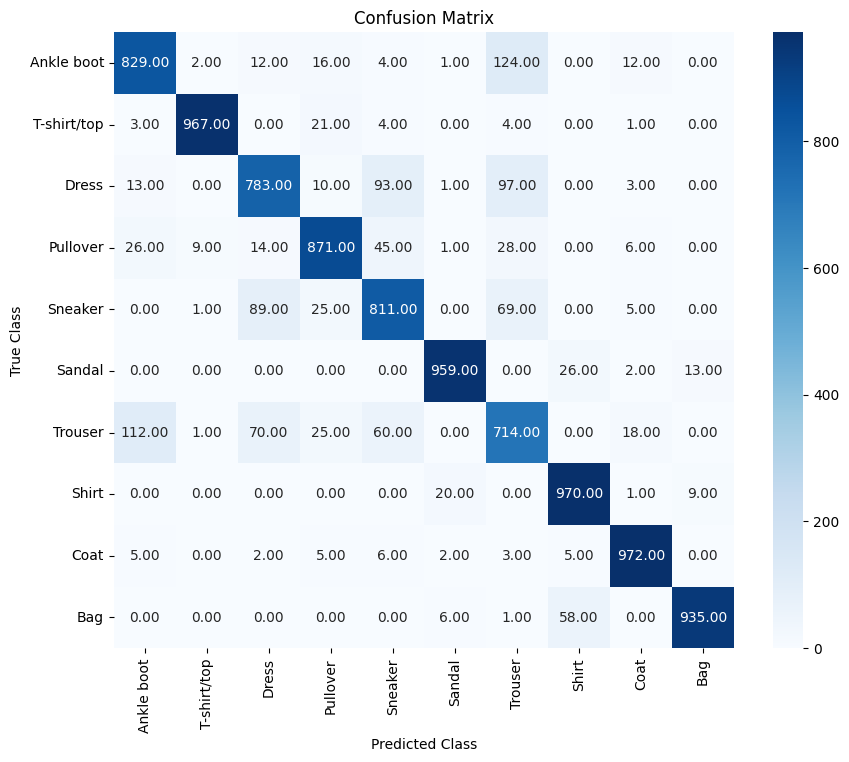

In [30]:
"""
config = h_param_config_defaults
loss_type = "ce" if config["loss"] == "cross_entropy" else "mse"
run = wandb.init(project="temp proj", name = f"{config['optimizer']}_hl_{config['hidden_layers']}_hlsize_{config['hl_size']}_bs_{config['batch_size']}_ac_{config['activation']}_init_{config['initialization']}_loss_{loss_type}", config=config)
nn =NeuralNetwork(784, 10, h_param_config_defaults)
nn.gradient_descent(x_train_data, y_train_data, x_validation_data, y_validation_data)
nn.plot_confusion_matrix( flattened_test_data, y_test_data )

"""


# Assign hyperparameters to a configuration variable
configuration = hyperparameter_defaults

# Determine the loss type for naming the run
loss_type = "cross_entropy" if configuration["loss"] == "cross_entropy" else "mean_squared_error"

# Initialize a new wandb run with a descriptive name
wandb_run = wandb.init(
    project="DeepLearning_Assignment1",
    name=f"{configuration['optimizer']}_hidden_layers_{configuration['hidden_layers']}_"
         f"hl_size_{configuration['hl_size']}_batch_size_{configuration['batch_size']}_"
         f"activation_{configuration['activation']}_initialization_{configuration['initialization']}_"
         f"loss_{loss_type}",
    config=configuration
)

# Initialize the neural network
neural_network = NeuralNetwork(
    input_neurons=784,  # Input layer size (e.g., for MNIST images)
    output_neurons=10,  # Output layer size (e.g., for 10 classes)
    config=hyperparameter_defaults
)

# Train the neural network using gradient descent
neural_network.gradient_descent(x_train_final,  y_train_final,  x_validation_final, y_validation_final)

# Generate and plot the confusion matrix for test data
neural_network.generate_confusion_matrix(  # Changed to generate_confusion_matrix
    test_data=x_test_processed,  # Changed from flattened_test_data to x_test_processed
    test_labels=test_labels  # Changed from y_test_data to test_labels
)

In [10]:
sweep_params = {
    'method' : 'bayes',
    'name'   : 'sweep-2',
    'metric' : {
        'goal' : 'maximize',
        'name' : 'train_accuracy',
    },
    'parameters' : {
        'epochs':{'values' : [5,10]},
        'hidden_layers':{'values' : [3,4,5]},
        'hl_size':{'values':[32,64,128]},
        'weight_decay':{'values' : [0, 0.0005, 0.5] } ,
        'learning_rate':{'values' : [0.0001,0.001]},
        'optimizer':{'values':['sgd','momentum','nestrov','rmsprop','adam', 'nadam']},
        'batch_size':{'values' : [16,32,64]},
        'initialization':{'values': ['random','xavier']},
        'activation':{'values' : ['sigmoid','tanh','relu']}
    }
}

sweep_id = wandb.sweep(sweep=sweep_params, project="DeepLearning_Assignment1")
print(sweep_id)
def train():
    run = wandb.init(project="DeepLearning_Assignment1")
    config = wandb.config
    n_network = CustomNeuralNetwork(784, 10, config)
    n_network.gradient_descent(x_train_final, y_train_final, x_validation_final, y_validation_final)
wandb.agent(sweep_id, function=train, count=50)

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


Create sweep with ID: e1j0sjtb
Sweep URL: https://wandb.ai/m_dhamu2908/DeepLearning_Assignment1/sweeps/e1j0sjtb
e1j0sjtb


wandb: Agent Starting Run: x1bxoa30 with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layers: 4
wandb: 	hl_size: 64
wandb: 	initialization: xavier
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0.0005


Exception in thread Thread-12 (_run_job):
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/wandb/agents/pyagent.py", line 306, in _run_job
    self._function()
  File "<ipython-input-10-e09f24eacce3>", line 26, in train
  File "<ipython-input-8-a089c5d4d0dc>", line 10, in __init__
  File "/usr/local/lib/python3.11/dist-packages/wandb/sdk/wandb_config.py", line 130, in __getitem__
    return self._items[key]
           ~~~~~~~~~~~^^^^^
KeyError: 'num_hidden_layers'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/lib/python3.11/threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.11/threading.py", line 982, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.11/dist-packages/wandb/agents/pyagent.py", line 311, in _run_job
    wandb.finish(exit_code=1)
  File "/usr/local/lib/python3.11/dist-packages/wandb/sdk/wandb_run.py"

Exception in thread Thread-13 (_run_job):
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/wandb/agents/pyagent.py", line 306, in _run_job
    self._function()
  File "<ipython-input-10-e09f24eacce3>", line 24, in train
  File "/usr/local/lib/python3.11/dist-packages/wandb/sdk/wandb_init.py", line 1482, in init
    wandb._sentry.reraise(e)
  File "/usr/local/lib/python3.11/dist-packages/wandb/analytics/sentry.py", line 156, in reraise
    raise exc.with_traceback(sys.exc_info()[2])
  File "/usr/local/lib/python3.11/dist-packages/wandb/sdk/wandb_init.py", line 1468, in init
    return wi.init(run_settings, run_config)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/wandb/sdk/wandb_init.py", line 779, in init
    with telemetry.context() as tel:
  File "/usr/local/lib/python3.11/dist-packages/wandb/sdk/lib/telemetry.py", line 42, in __exit__
    self._run._telemetry_callback(self._obj)
  File "/usr/local/lib/p

Exception in thread Thread-14 (_run_job):
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/wandb/agents/pyagent.py", line 306, in _run_job
    self._function()
  File "<ipython-input-10-e09f24eacce3>", line 24, in train
  File "/usr/local/lib/python3.11/dist-packages/wandb/sdk/wandb_init.py", line 1482, in init
    wandb._sentry.reraise(e)
  File "/usr/local/lib/python3.11/dist-packages/wandb/analytics/sentry.py", line 156, in reraise
    raise exc.with_traceback(sys.exc_info()[2])
  File "/usr/local/lib/python3.11/dist-packages/wandb/sdk/wandb_init.py", line 1468, in init
    return wi.init(run_settings, run_config)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/wandb/sdk/wandb_init.py", line 779, in init
    with telemetry.context() as tel:
  File "/usr/local/lib/python3.11/dist-packages/wandb/sdk/lib/telemetry.py", line 42, in __exit__
    self._run._telemetry_callback(self._obj)
  File "/usr/local/lib/p

Exception in thread Thread-15 (_run_job):
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/wandb/agents/pyagent.py", line 306, in _run_job
    self._function()
  File "<ipython-input-10-e09f24eacce3>", line 24, in train
  File "/usr/local/lib/python3.11/dist-packages/wandb/sdk/wandb_init.py", line 1482, in init
    wandb._sentry.reraise(e)
  File "/usr/local/lib/python3.11/dist-packages/wandb/analytics/sentry.py", line 156, in reraise
    raise exc.with_traceback(sys.exc_info()[2])
  File "/usr/local/lib/python3.11/dist-packages/wandb/sdk/wandb_init.py", line 1468, in init
    return wi.init(run_settings, run_config)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/wandb/sdk/wandb_init.py", line 779, in init
    with telemetry.context() as tel:
  File "/usr/local/lib/python3.11/dist-packages/wandb/sdk/lib/telemetry.py", line 42, in __exit__
    self._run._telemetry_callback(self._obj)
  File "/usr/local/lib/p

Error in callback <bound method _WandbInit._pause_backend of <wandb.sdk.wandb_init._WandbInit object at 0x785fdc1fdad0>> (for post_run_cell):


BrokenPipeError: [Errno 32] Broken pipe

Error in callback <bound method _WandbInit._pause_backend of <wandb.sdk.wandb_init._WandbInit object at 0x7f9fb0e0df10>> (for post_run_cell):


BrokenPipeError: [Errno 32] Broken pipe